## Polynomial Regression

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the libraries

In [2]:
df = pd.read_csv("cars.csv")
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
df.sample(15)

,Car,Model,Volume,Weight,CO2
11,Suzuki,Swift,1300,990,101
2,Skoda,Citigo,1000,929,95
18,Skoda,Rapid,1600,1119,104
27,Audi,A6,2000,1725,114
15,Opel,Astra,1600,1330,97
1,Mitsubishi,Space Star,1200,1160,95
5,VW,Up!,1000,929,105
28,Volvo,V70,1600,1523,109
24,Volvo,S60,2000,1415,99
3,Fiat,500,900,865,90


In [3]:
df.head(15)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [4]:
df.tail(15)

,Car,Model,Volume,Weight,CO2
21,Opel,Insignia,2000,1428,99
22,Mercedes,C-Class,2100,1365,99
23,Skoda,Octavia,1600,1415,99
24,Volvo,S60,2000,1415,99
25,Mercedes,CLA,1500,1465,102
26,Audi,A4,2000,1490,104
27,Audi,A6,2000,1725,114
28,Volvo,V70,1600,1523,109
29,BMW,5,2000,1705,114
30,Mercedes,E-Class,2100,1605,115


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E26D2ED08>,
      dtype=object)

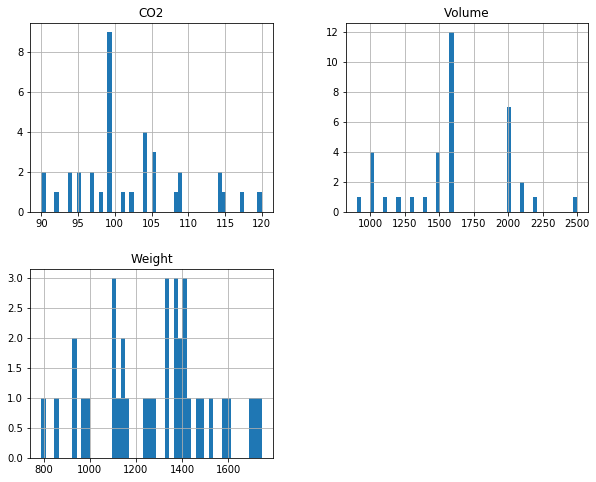

In [5]:
df.hist(bins = 50, figsize=(10, 8))

### Check the  values of each object of the dataset

In [6]:
df["Car"].unique()

array(['Toyoty', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Hundai', 'Opel',
       'BMW', 'Mazda', 'Volvo'], dtype=object)

In [7]:
value_count_1 = df["Car"].value_counts()
value_count_1[-10:]

Honda         1
Fiat          1
Mitsubishi    1
Toyoty        1
Mini          1
VW            1
Suzuki        1
Hundai        1
Hyundai       1
Mazda         1
Name: Car, dtype: int64

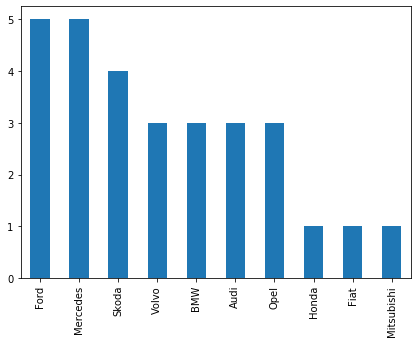

In [8]:
value_count_1[:10].plot(kind = "bar", figsize=(7, 5))

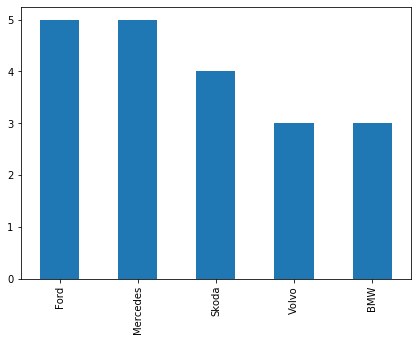

In [9]:
value_count_1[:5].plot(kind="bar", figsize=(7, 5))

In [10]:
df["Model"].unique()

array(['Aygo', 'Space Star', 'Citigo', '500', 'Cooper', 'Up!', 'Fabia',
       'A-Class', 'Fiesta', 'A1', 'I20', 'Swift', 'Civic', 'I30', 'Astra',
       '1', '3', 'Rapid', 'Focus', 'Mondeo', 'Insignia', 'C-Class',
       'Octavia', 'S60', 'CLA', 'A4', 'A6', 'V70', '5', 'E-Class', 'XC70',
       'B-Max', '216', 'Zafira', 'SLK'], dtype=object)

In [11]:
value_count_2 = df["Model"].value_counts()
value_count_2[:10]

Fiesta      2
Insignia    1
Octavia     1
A4          1
CLA         1
A6          1
A1          1
Civic       1
A-Class     1
Up!         1
Name: Model, dtype: int64

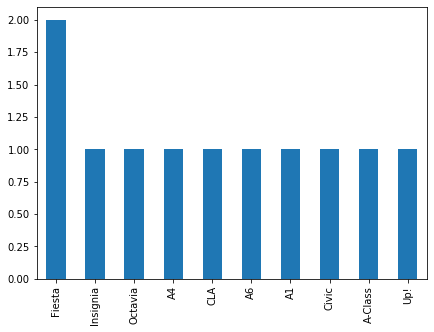

In [12]:
value_count_2[:10].plot(kind="bar", figsize=(7, 5))

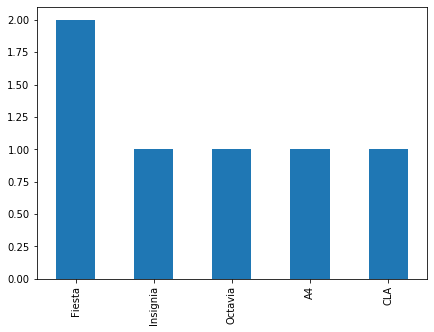

In [13]:
value_count_2[:5].plot(kind = "bar", figsize=(7, 5))

## Check the shape of the dataset

In [14]:
df.shape

(36, 5)

In [15]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [16]:
print(X)

[[ 790]
 [1160]
 [ 929]
 [ 865]
 [1140]
 [ 929]
 [1109]
 [1365]
 [1112]
 [1150]
 [ 980]
 [ 990]
 [1112]
 [1252]
 [1326]
 [1330]
 [1365]
 [1280]
 [1119]
 [1328]
 [1584]
 [1428]
 [1365]
 [1415]
 [1415]
 [1465]
 [1490]
 [1725]
 [1523]
 [1705]
 [1605]
 [1746]
 [1235]
 [1390]
 [1405]
 [1395]]


In [17]:
print(y)

[ 99  95  95  90 105 105  90  92  98  99  99 101  99  94  97  97  99 104
 104 105  94  99  99  99  99 102 104 114 109 114 115 117 104 108 109 120]


## Basic insight into the Dataset



### Data type

In [18]:
df.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

### Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


### Descriptive Stastics

In [20]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


### Handling Misiing Values

In [21]:
missing_data = df.isnull()
missing_data

,Car,Model,Volume,Weight,CO2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Check the number of missing data point column

In [22]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Car
False    36
Name: Car, dtype: int64

Model
False    36
Name: Model, dtype: int64

Volume
False    36
Name: Volume, dtype: int64

Weight
False    36
Name: Weight, dtype: int64

CO2
False    36
Name: CO2, dtype: int64



### Dummy Variable

In [23]:
dummy_variable_1 = pd.get_dummies(df["Model"])
dummy_variable_1.head()

,1,216,3,5,500,A-Class,A1,A4,A6,Astra,...,Octavia,Rapid,S60,SLK,Space Star,Swift,Up!,V70,XC70,Zafira
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
dummy_variable_2 = pd.get_dummies(df["Car"])
dummy_variable_2.head()

,Audi,BMW,Fiat,Ford,Honda,Hundai,Hyundai,Mazda,Mercedes,Mini,Mitsubishi,Opel,Skoda,Suzuki,Toyoty,VW,Volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### We already declared the features and the target
**X = features**

**y = target**

### Train the Linear Regression Model on the whole dataset

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Training the Polynomial Regression Model on whole dataset

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
regressor_2 = LinearRegression()
regressor_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

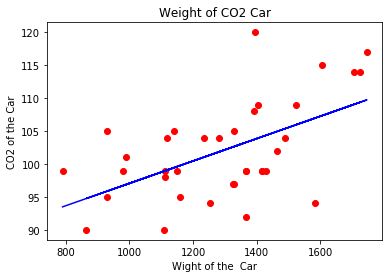

In [27]:
plt.scatter(X, y, color = "red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.title("Weight of CO2 Car")
plt.xlabel("Wight of the  Car")
plt.ylabel("CO2 of the Car")
plt.show()

### Visualising the Polynomial Results

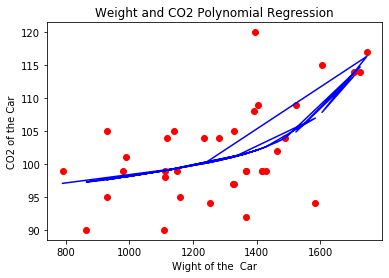

In [28]:
plt.scatter(X, y, color = "red")
plt.plot(X, regressor_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Weight and CO2 Polynomial Regression")
plt.xlabel("Wight of the  Car")
plt.ylabel("CO2 of the Car")
plt.show()

### Visualising Polynomial Regression Model Results (for high resolution and smoother curve)

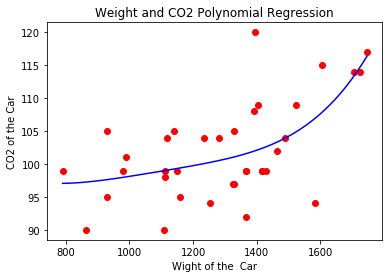

In [29]:
X_grid = np.arange(min(X), max(X),0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regressor_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Weight and CO2 Polynomial Regression")
plt.xlabel("Wight of the  Car")
plt.ylabel("CO2 of the Car")
plt.show()

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Weight ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('CO2 of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['Weight']
y = df['CO2']

In [32]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
4.436e-08 x - 0.0001424 x + 0.1575 x + 39.02


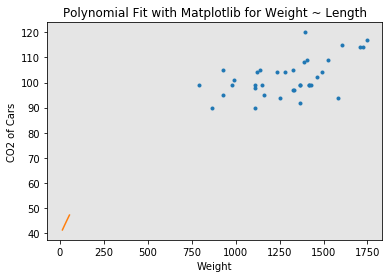

In [33]:
PlotPolly(p, x, y, 'Weight')

### Predict the new result with Linear Regression

In [34]:
regressor.predict([[790.5]])

array([93.49768873])

### Predict the new result with Polynomial regression Model

In [35]:
regressor_2.predict(poly_reg.fit_transform([[790.5]]))

array([97.05845296])

### Evaluate the Model Performance

In [36]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.38824958105060936


### Let Calculate MSE

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(df["CO2"], p(x))

33.051043660815886